### Install required dependencies

In [1]:
%pip install -r studio1.req.txt

Note: you may need to restart the kernel to use updated packages.


### Import required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mno
import seaborn as sns
import itertools

import os
import warnings

### Define config

In [3]:
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.float_format = '{:.7f}'.format

### Read and get data information

In [3]:
CURR_PATH = os.getcwd()
raw_df = pd.read_csv(CURR_PATH + '/datasets/water_potability.csv')
concrete_df = raw_df.copy()
concrete_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


### Get shape of the dataset

In [4]:
concrete_df.shape

(3276, 10)

In [5]:
print("Number of rows = {0} and Number of Columns = {1} in Data frame".format(concrete_df.shape[0],concrete_df.shape[1]))

Number of rows = 3276 and Number of Columns = 10 in Data frame


### Get data type of each attribute

In [6]:
concrete_df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

### Check dataframe information

In [7]:
concrete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


### Get columns

In [8]:
COLS = [c for c in concrete_df.columns]
print(COLS)

['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']


## Data Cleaning

### Check duplications

In [9]:
print("Duplicated: ",int(concrete_df.duplicated().sum()))

Duplicated:  0


In [10]:
dup = concrete_df[concrete_df.duplicated()]
dup


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability


### Drop duplications if have

In [11]:
concrete_df.drop_duplicates(inplace=True)
print(f"After dropping duplications: {concrete_df.shape}")

After dropping duplications: (3276, 10)


### Check outliers

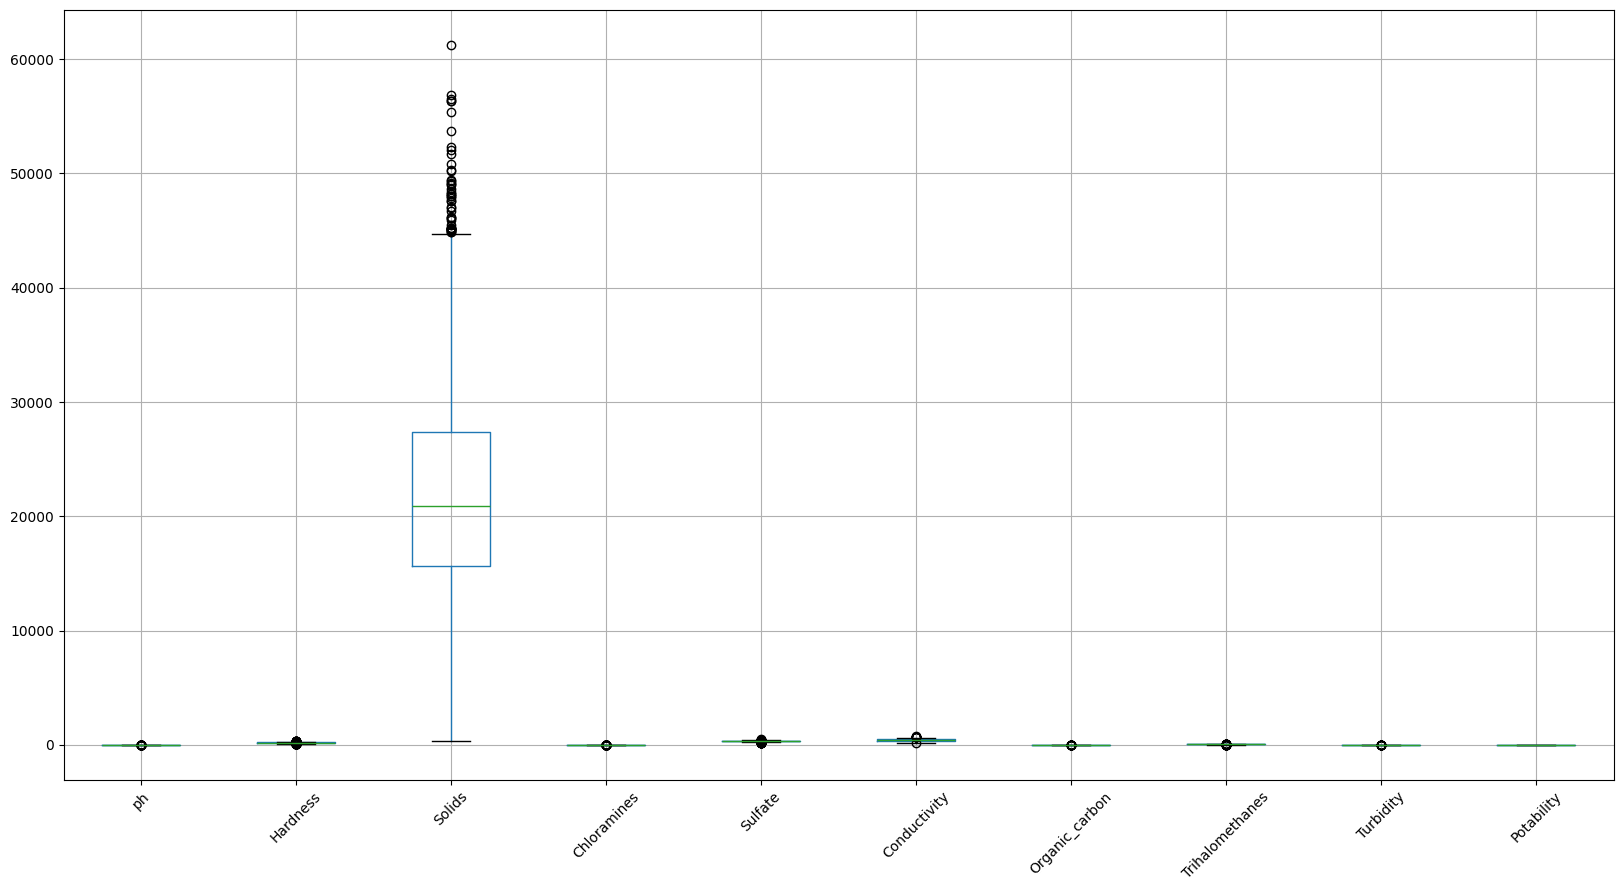

In [12]:
concrete_df.boxplot(column=COLS, rot=45, figsize=(20, 10))
plt.show()

### Quantile based outlier detection and cleaning

In [13]:
concrete_df_outliers = pd.DataFrame(concrete_df.loc[:,])
Q1 = concrete_df_outliers.quantile(0.25)
Q3 = concrete_df_outliers.quantile(0.75)
IQR = Q3 - Q1
print(IQR)



ph                     1.968974
Hardness              39.816918
Solids             11666.071830
Chloramines            1.987466
Sulfate               52.250673
Conductivity         116.057890
Organic_carbon         4.491850
Trihalomethanes       21.492937
Turbidity              1.060609
Potability             1.000000
dtype: float64


In [14]:
# Filter out the outliers by using IQR method, only keep the valid data
for i, j in zip(np.where(concrete_df_outliers > Q3 + 1.5 * IQR)[0], np.where(concrete_df_outliers > Q3 + 1.5 * IQR)[1]):
  whisker  = Q3 + 1.5 * IQR
  concrete_df_outliers.iloc[i,j] = whisker[j]

# Replace every outlier on the lower side by the lower whisker - for 'water' column
for i, j in zip(np.where(concrete_df_outliers < Q1 - 1.5 * IQR)[0], np.where(concrete_df_outliers < Q1 - 1.5 * IQR)[1]):
  whisker  = Q1 - 1.5 * IQR
  concrete_df_outliers.iloc[i,j] = whisker[j]

concrete_df_outliers.shape





/var/folders/d9/kz74ycxx51xgf_md1xlhtzdr0000gn/T/ipykernel_79950/2513274407.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  concrete_df_outliers.iloc[i,j] = whisker[j]
/var/folders/d9/kz74ycxx51xgf_md1xlhtzdr0000gn/T/ipykernel_79950/2513274407.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  concrete_df_outliers.iloc[i,j] = whisker[j]
/var/folders/d9/kz74ycxx51xgf_md1xlhtzdr0000gn/T/ipykernel_79950/2513274407.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value

(3276, 10)

In [15]:
# Remove outliers columns
concrete_df.drop(columns=concrete_df.loc[:,], inplace=True)


In [16]:
# Concat the cleaned data with the outliers data
concrete_df = pd.concat([concrete_df, concrete_df_outliers], axis=1)
concrete_df.shape



(3276, 10)

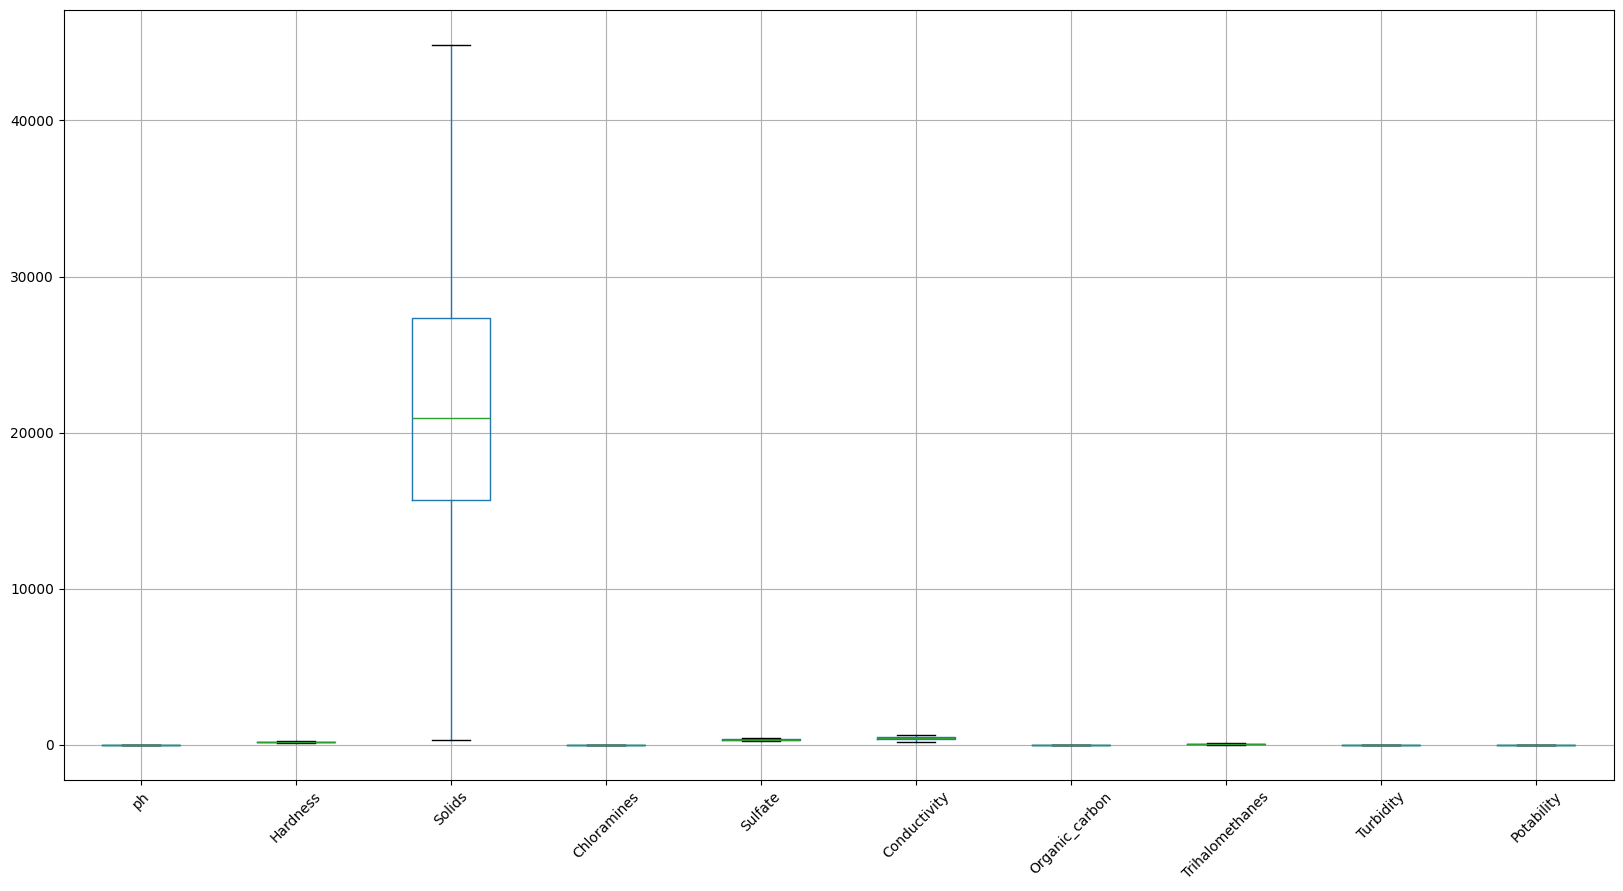

In [17]:
# Revalidate the outliers again
concrete_df.boxplot(column=COLS, rot=45, figsize=(20, 10))
plt.show()

In [18]:
# Check null
concrete_df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [19]:
# Drop null values
concrete_df.dropna(inplace=True)
concrete_df.shape


(2011, 10)

In [20]:
# Check if there are missing values

concrete_df_missval = concrete_df.copy()
isDuplicates = False

for x in concrete_df_missval.columns:
  concrete_df_missval[x] = concrete_df_missval[x].astype(str).str.replace(".", "")
  res = concrete_df_missval[x].astype(str).str.isalnum()
  if False in res.unique():
    isDuplicates = True
    print('For column "{}" unique values are {}'.format(x, concrete_df_missval[x].unique()))
    print('\n')

if isDuplicates == False:
  print("No duplicates found")
else:
  print("Duplicates found")





No duplicates found


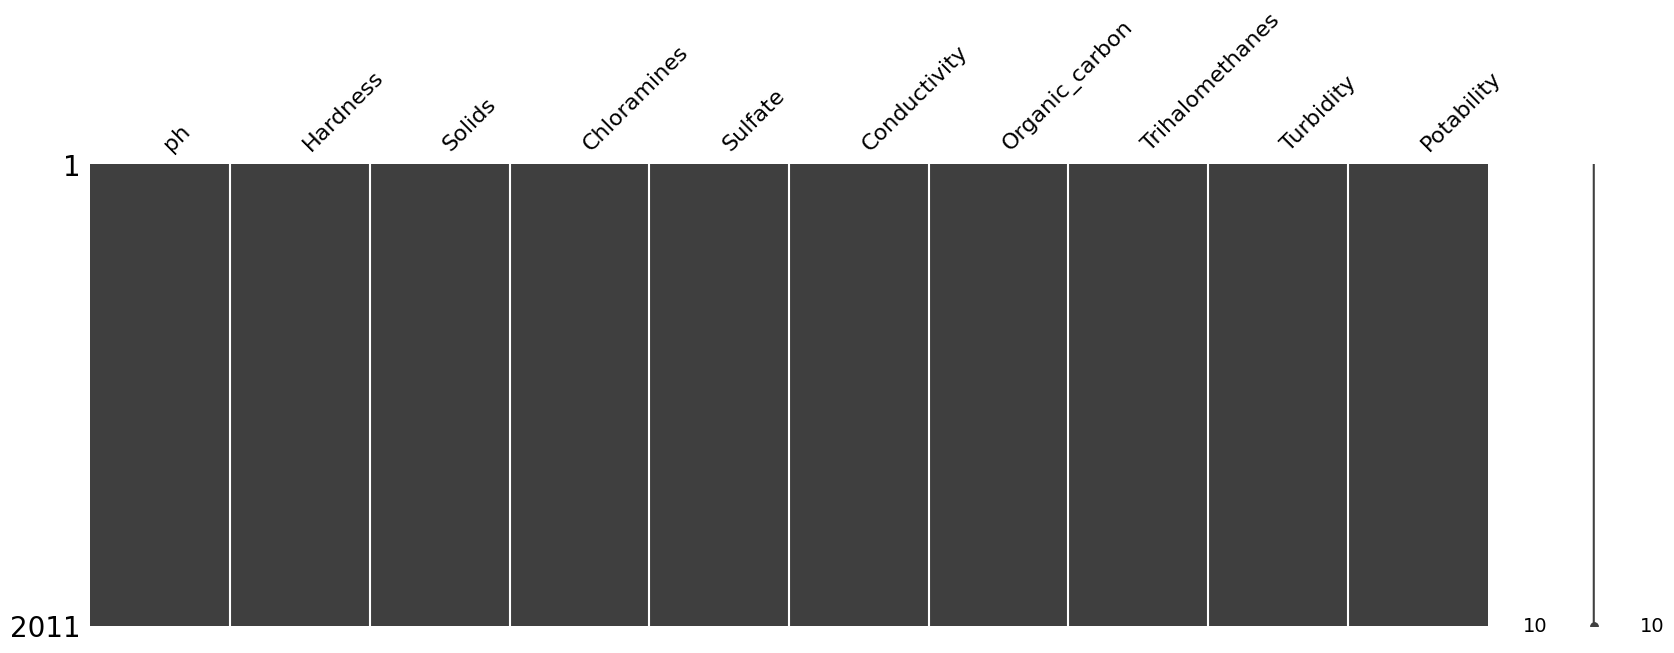

In [21]:
mno.matrix(concrete_df, figsize=(20, 6))
plt.show()

In [22]:
concrete_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2011.0,7.087083,1.534158,3.139631,6.089723,7.027297,8.052969,11.015527
Hardness,2011.0,196.059193,31.913049,117.125160,176.744938,197.191839,216.441070,276.392834
Solids,2011.0,21872.334192,8503.069452,320.942611,15615.665390,20933.512750,27182.587067,44831.869873
Chloramines,2011.0,7.131854,1.547518,3.146221,6.138895,7.143907,8.109726,11.096086
Sulfate,2011.0,333.351809,40.117802,229.323489,307.632511,332.232177,359.330555,438.326179
Conductivity,2011.0,426.418654,80.361899,201.619737,366.680307,423.455906,482.373169,655.879140
Organic_carbon,2011.0,14.357587,3.305421,5.328026,12.124105,14.322019,16.683049,23.295427
Trihalomethanes,2011.0,66.406670,15.908619,23.605130,55.952664,66.542198,77.291925,109.576879
Turbidity,2011.0,3.969527,0.775907,1.848797,3.442915,3.968177,4.514175,6.091233
Potability,2011.0,0.403282,0.490678,0.000000,0.000000,0.000000,1.000000,1.000000


### Summary
- We had 0 duplicate instances in dataset and has dropped those duplicates.
- There are 1434 null values across 3 columns, which are 'ph', 'Sulfate' and 'Trihalomethanes'. We have dropped these null values.
- We had outliers in every columns except 'Potability', handled these outliers by replacing every outlier with upper side of the whisker.
- There are no missing values in the dataset

## EDA (Exploratory Data Analysis)

### Variable Identification 
- Target Variable: 'Potability'
- Predictor Variables: 'ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity'




### Univariate Analysis
Numerical Variables: 'ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity'

/var/folders/d9/kz74ycxx51xgf_md1xlhtzdr0000gn/T/ipykernel_79950/1226000480.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(concrete_df[i], color=k, rug=True)
/var/folders/d9/kz74ycxx51xgf_md1xlhtzdr0000gn/T/ipykernel_79950/1226000480.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.di

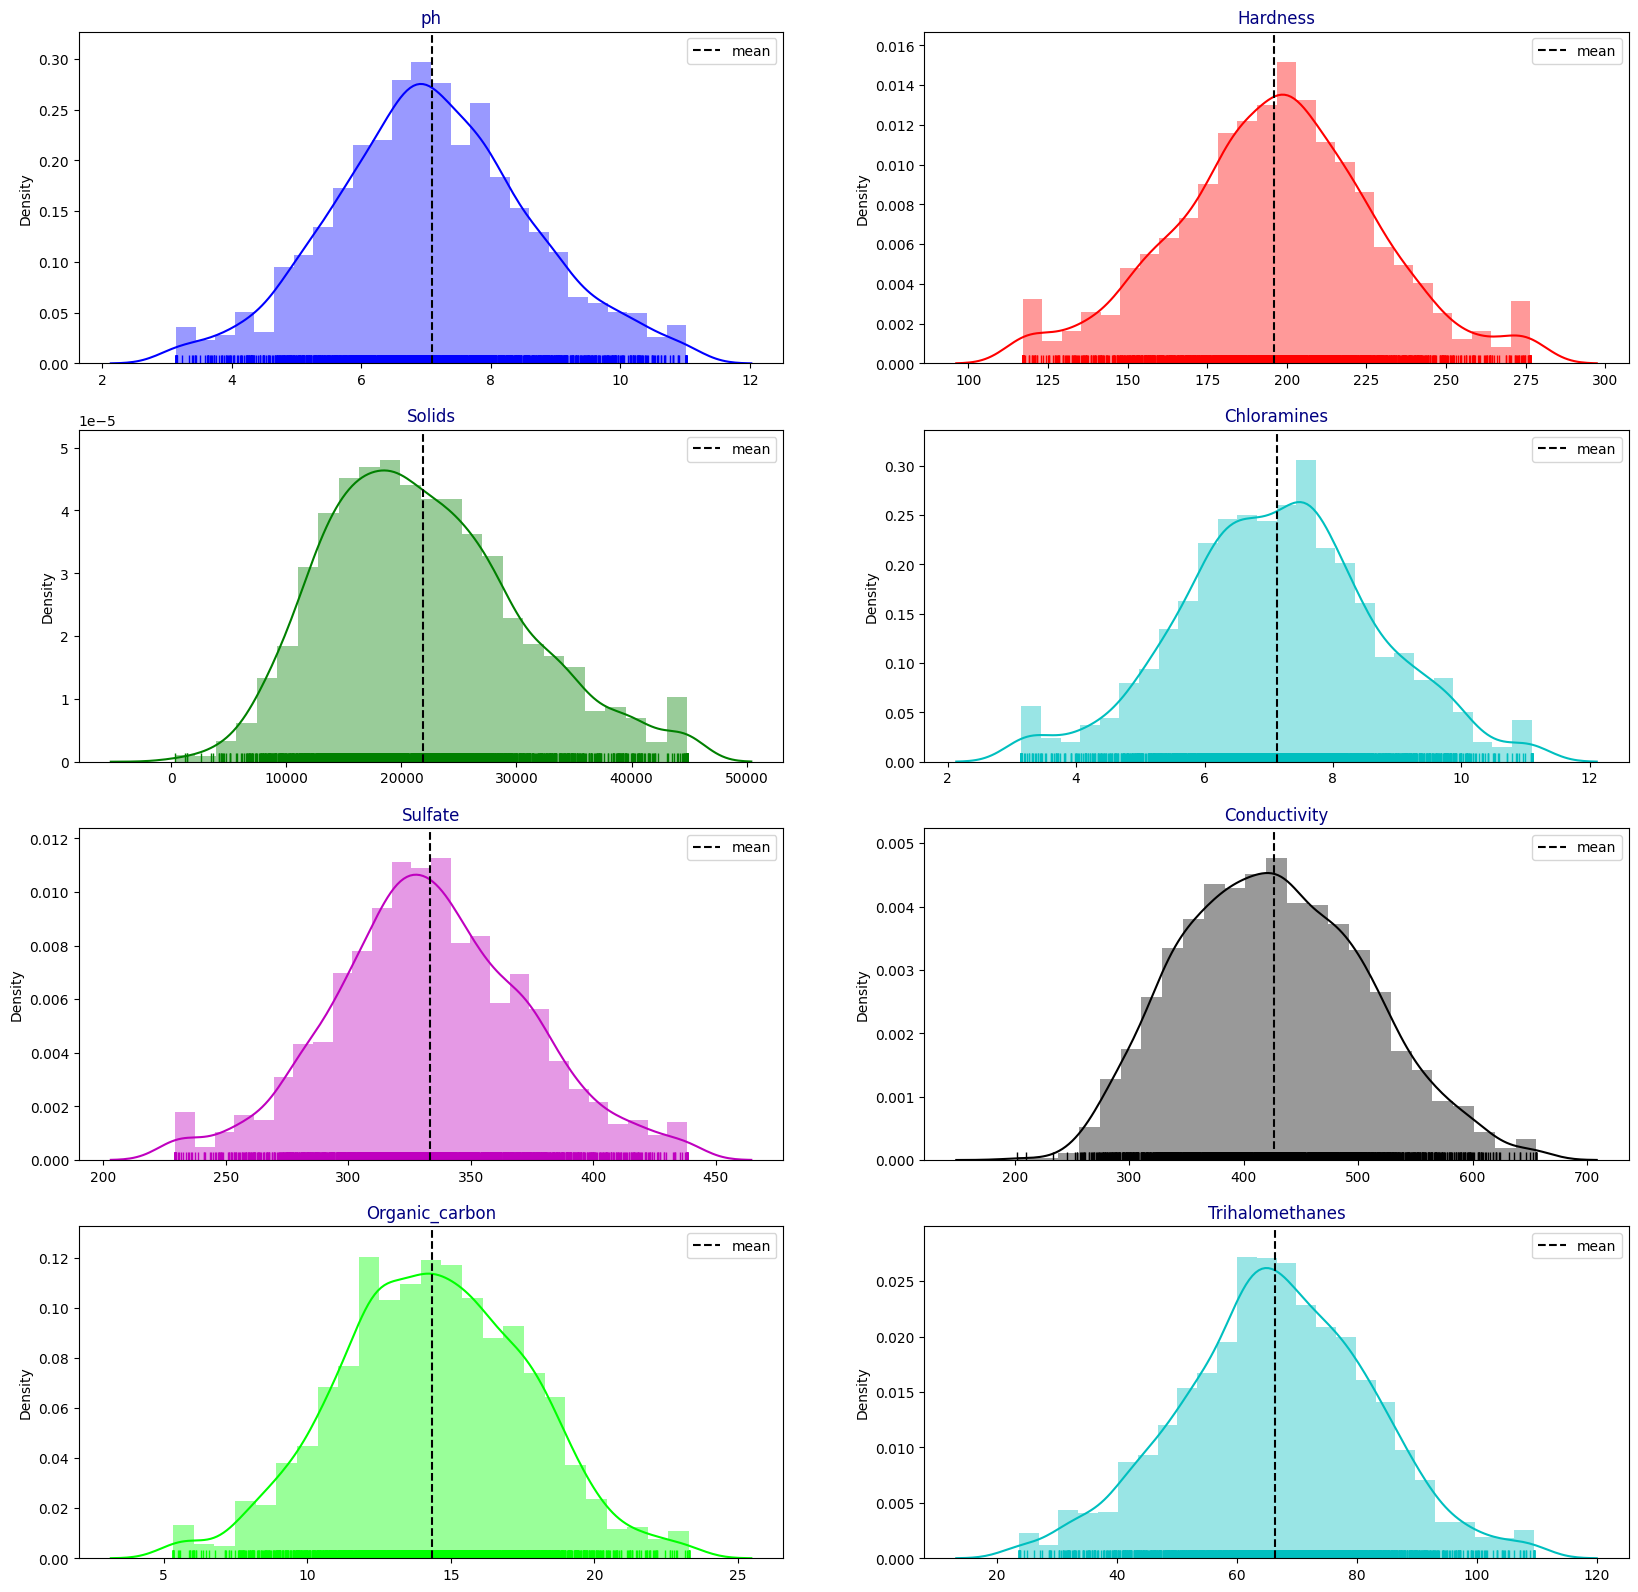

In [23]:
COLS_WITHOUT_TARGET = [c for c in concrete_df.columns if c != 'Potability']
length = len(COLS_WITHOUT_TARGET)
cs = ["b","r","g","c","m","k","lime","c"]
fig = plt.figure(figsize=(20, 25))

# Create a 5x2 subplot grid to fit 9 plots (with one empty spot)
for i, j, k in zip(COLS_WITHOUT_TARGET, range(length), cs):
    # Use 5x2 grid instead of 4x2 to avoid the "num must be <= 8" error
    plt.subplot(5, 2, j+1)
    ax = sns.distplot(concrete_df[i], color=k, rug=True)
    ax.set_facecolor("w")
    plt.axvline(concrete_df[i].mean(), linestyle="dashed", label="mean", color="k")
    plt.legend(loc="best")
    plt.title(i, color="navy")
    plt.xlabel("")
plt.show()

- ph: Slightly right skewed - No gaussian distribution
- Hardness: Slightly left skewed - No gaussian distribution
- Solids: Right skewed - No gaussian distribution
- Chloramines: Slightly left skewed - 2 gaussians distribution
- Sulfate: Slightly right skewed - No gaussian distribution
- Conductivity: Slightly right skewed - No gaussian distribution
- Organic_carbon: Slightly right skewed - No gaussian distribution
- Trihalomethanes: Slightly right skewed - No gaussian distribution

/var/folders/d9/kz74ycxx51xgf_md1xlhtzdr0000gn/T/ipykernel_79950/1525126998.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(concrete_df["Potability"],color="b",rug=True)


<Figure size 1300x600 with 0 Axes>

<Figure size 1300x600 with 0 Axes>

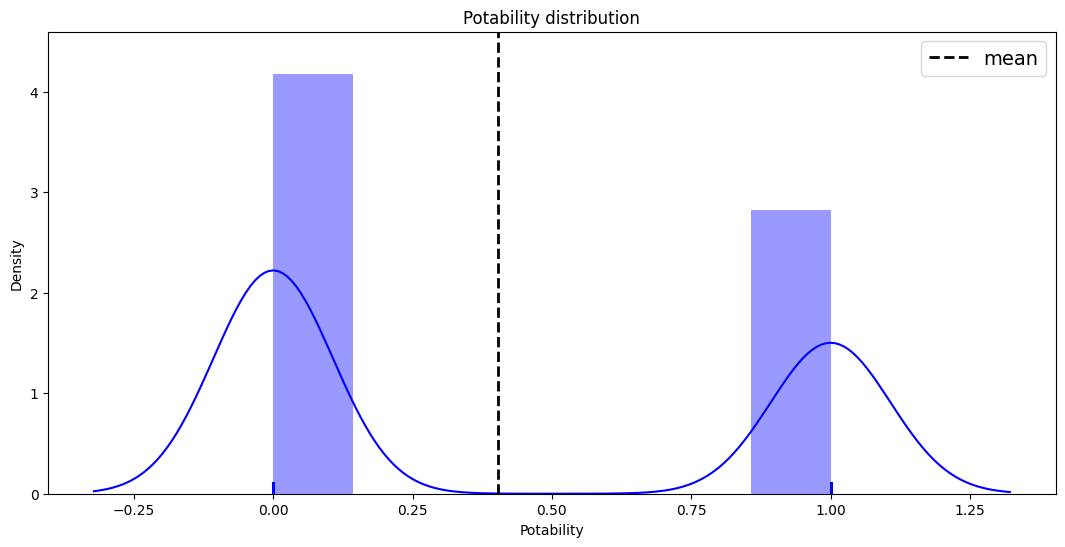

In [26]:
plt.figure(figsize=(13,6))
sns.distplot(concrete_df["Potability"],color="b",rug=True)
plt.axvline(concrete_df["Potability"].mean(), linestyle="dashed",color="k", label='mean',linewidth=2)
plt.legend(loc="best",prop={"size":14})
plt.title("Potability distribution")
plt.show()

- Potability: 2 gaussians distribution and not so uniformly distributed

In [27]:
concrete_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2011.0,7.087083,1.534158,3.139631,6.089723,7.027297,8.052969,11.015527
Hardness,2011.0,196.059193,31.913049,117.125160,176.744938,197.191839,216.441070,276.392834
Solids,2011.0,21872.334192,8503.069452,320.942611,15615.665390,20933.512750,27182.587067,44831.869873
Chloramines,2011.0,7.131854,1.547518,3.146221,6.138895,7.143907,8.109726,11.096086
Sulfate,2011.0,333.351809,40.117802,229.323489,307.632511,332.232177,359.330555,438.326179
Conductivity,2011.0,426.418654,80.361899,201.619737,366.680307,423.455906,482.373169,655.879140
Organic_carbon,2011.0,14.357587,3.305421,5.328026,12.124105,14.322019,16.683049,23.295427
Trihalomethanes,2011.0,66.406670,15.908619,23.605130,55.952664,66.542198,77.291925,109.576879
Turbidity,2011.0,3.969527,0.775907,1.848797,3.442915,3.968177,4.514175,6.091233
Potability,2011.0,0.403282,0.490678,0.000000,0.000000,0.000000,1.000000,1.000000


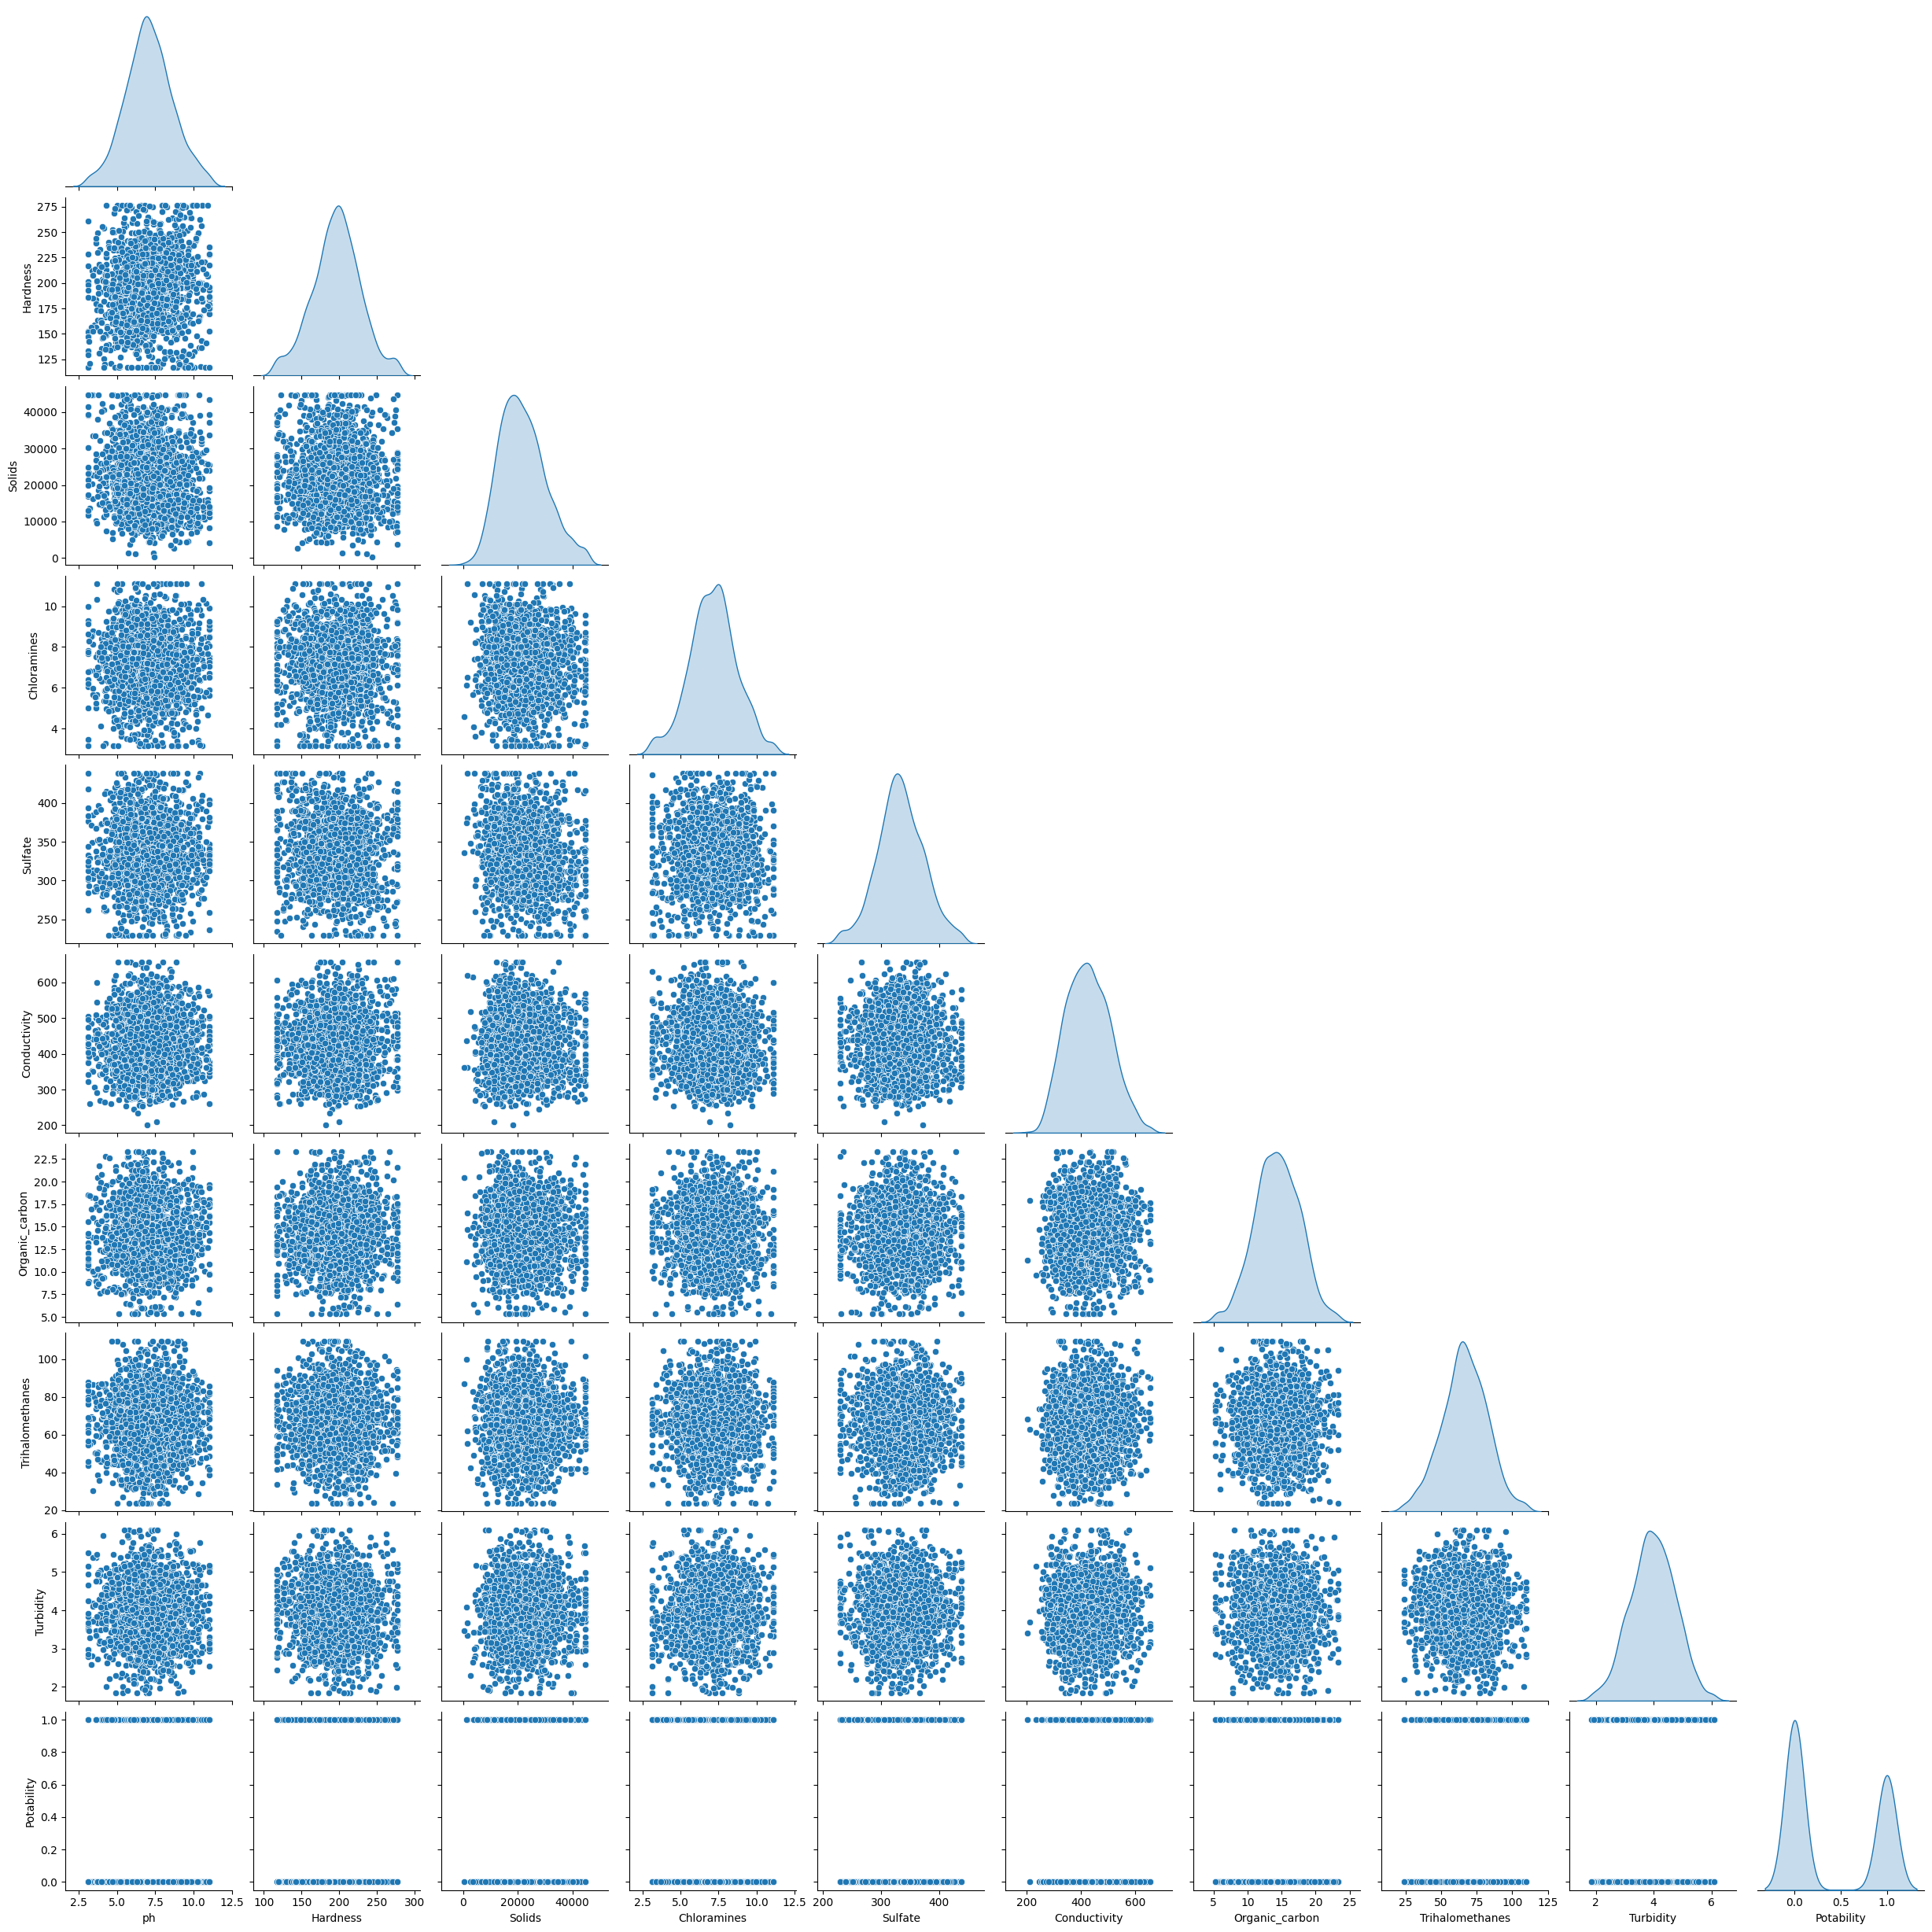

In [30]:
sns.pairplot(concrete_df, diag_kind="kde", corner=True)
plt.show()


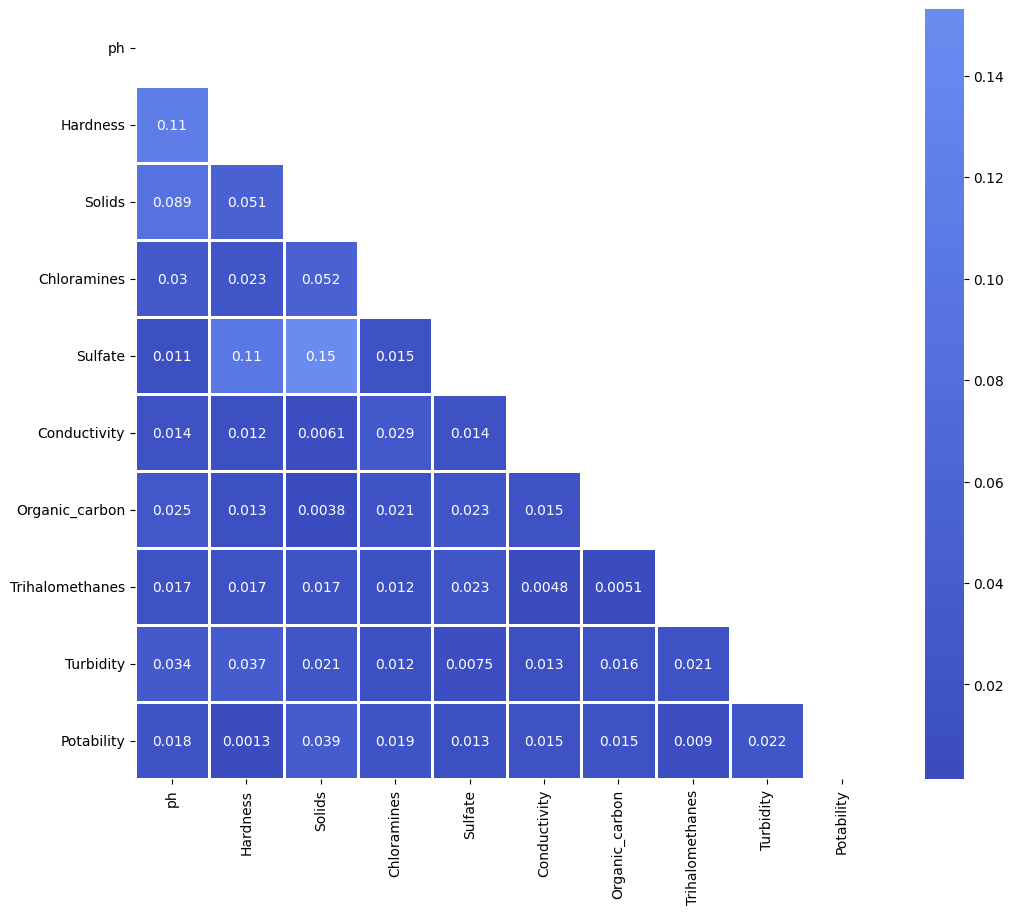

In [31]:
corr = abs(concrete_df.corr()) # correlation matrix
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (12,10))
sns.heatmap(lower_triangle, center = 0.5, cmap = 'coolwarm', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= True, linewidths= 1, mask = mask)   # Da Heatmap
plt.show()